# Analisi dei corrispettivi dell'azienda <<Là di Cjastelan>>

## Intro

### Descrizione dei dati grezzi

I dati vanno da gennaio 2018 a maggio 2025.

Dal 2018 a maggio 2022 i dati sono stati raccolti manualmente da Riccardo Castellani, da giugno 2022 a marzo 2024 la raccolta, sempre manuale, è stata fatta da Dario Castellani, mentre da aprile 2024 a oggi viene utilizzato un Google Form per far inserire direttamente agli operatori di cassa i vari corrispettivi della giornata.

La raccolta manuale è stata fatta su diversi fogli elettronici Excel. I file prodotti da Riccardo (2018-2022) raccolgono i corrispettivi di un intero anno solare e sono composti da 12 fogli elettronici, uno per ciascun mese dell'anno. I file prodotti da Dario sono annuali per il 2022 e il 2023, divisi per trimestri per il 2024; manca il file relativo all'ultimo trimestre del 2024, essendo questo stato compilato direttamente su cloud in un GoogleDoc. L'ultimo file Excel prodotto da Dario riguarda il primo trimestre del 2025.

Il file del 2022 esiste in doppia versione, una prodotta da Riccardo e una da Dario. La versione di Riccardo verrà ignorata nell'analisi: si tratta, infatti, di una collezione parziale, mancando dell'ultimo trimestre e avendo registrazioni non complete nel trimestre estivo; il file di Dario, invece, duplica tutti i dati corretti della versione di Riccardo e completa e corregge le informazioni mancanti, oltre ad avere i dati dell'ultimo trimestre.

La struttura interna dei fogli di calcolo è simile per ciascun foglio, al netto di aggiunte di casse e reparti che sono arrivate negli anni. I dati sono organizzati in forma tabulare, divisi sulle righe per giorno e sulle colonne per reparti di IVA, raggruppati per cassa. Ai margini ha i totali complessivi e per reparto.

Nel 2018 e nel 2019, la cassa 1 ha 3 reparti: `IVA 4`, `IVA 10` e `IVA 22`, in `IVA 10` collassano i corrispettivi dei reparti 2 e 3. La cassa 2 ha, invece, 4 reparti: `IVA 4`, due `IVA 10` con lo stesso nome ma diversi, probabilmente il primo associato  al Reparto 3 e il secondo al Reparto 2, e un `IVA 22`.

Nel 2020 anche la Cassa 1 presenta una doppia colonna `IVA 10`, probabilmente la prima associata al Reparto 2 e la seconda al Reparto 3. La Cassa 2, invece, sembra invertire l'ordine di associazione dei reparti, avendo nella prima colonna `IVA 10` i corrispettivi del Reparto 2 e, nella seconda colonna `IVA 10`, i corrispettivi del Reparto 3. Dal mese di luglio compare una colonna `gelato` che corrisponde al Reparto 4. Nonostante la presenza del Reparto 4 (che ricade nell'ivaggio commerciale), nella sezione dei totali non compare la colonna `IVA 10 Comm` e i corrispettivi del Reparto 4 vengono fatti confluire nel computo dell'`IVA 10`.

Nel 2021 le colonne con l'IVA al 10% confondono continuamente il Reparto 2 col Reparto 3, da marzo a giugno tutto collassa in un solo reparto. A luglio la colonna `gelato` diventa `DESSERT` ma afferisce sempre al Reparto 4; da agosto torna a chiamarsi `gelato`.

Nel 2022 la colonna `gelato` viene rinominata `COMM` fino ad aprile, quando torna a essere `gelato`. Da settembre si aggiunge ai dati la Cassa 3, che ha inizialmente sola due colonne `IVA 4` e `IVA 10`; poiché questa cassa viene usata solo in mercati dove si vende carne, la colonna corrisponde al Reparto 2. Da novembre la colonna effettivamente prende il nome di `Reparto 2` e si aggiunge anche la colonna `Reparto 5`. A dicembre la Cassa 3 non ha più la colonna `IVA 4`.

Dal 2023 le colonne cominciano a essere intestate ai reparti e non più all'ivaggio corrispondente.

**MANCA DESCRIZIONE DEI DATI WEB**

---

## Importazione dei dati

### Dati Excel

Cominciamo selezionando solo i file che ci interessano, tra tutti quelli consegnati.
Di seguito la struttura della directory `data/raw` dove ho salvato, ed estratto, il file `corrispettivi.zip` contenente tutti i dati consegnati dall'azienda.

In [1]:
import os

DATA_DIR = os.path.join(os.getcwd(), 'data')
RAW_DIR = os.path.join(DATA_DIR, 'raw')

Per motivi di privacy, i dati non sono presenti nel repository. Per questo motivo, riportiamo una rappresentazione testuale della struttura della directory `data/raw`, in modo da poter seguire più agevolmente il processo di selezione dei file utili.

In [2]:
!tree -a {RAW_DIR}

/media/yuuki/Data/Università_vera/II_Anno/Fondamenti_Scienza_Dei_Dati/Fond-Scienze-dei-Dati-progetto/data/raw
├── Corrispettivi_web.xlsx
├── corrispettivi.zip
├── Dario
│   ├── CORRISPETTIVI_2022.xlsx
│   ├── CORRISPETTIVI_2023.xlsx
│   ├── corrispettivi 2024.xlsx
│   ├── Corrispettivi apr-mag-giu 2024.xlsx
│   ├── corrispettivi gennaio marzo 2025.xlsx
│   └── corrispettivi lug-ago-set 2024.xlsx
├── .~lock.Corrispettivi_web.xlsx#
└── Riccardo
    ├── 2019
    │   ├── corrispettivi_ago_19.pdf
    │   ├── corrispettivi_apr_19.pdf
    │   ├── corrispettivi_dic_19.pdf
    │   ├── corrispettivi_feb_19.pdf
    │   ├── corrispettivi_gen_19.pdf
    │   ├── corrispettivi_giu_19.pdf
    │   ├── corrispettivi_lug_19.pdf
    │   ├── corrispettivi_mag_19.pdf
    │   ├── corrispettivi_mar_19.pdf
    │   ├── corrispettivi_nov_19.pdf
    │   ├── corrispettivi_ott_19.pdf
    │   └── corrispettivi_set_19.pdf
    ├── 2020
    │   ├── corrispettivi_ago_2020.pdf
    │   ├── corrispettivi_apr_20.pdf
    │  

I file sono divisi in due principali subdirectory nominate in base a chi ha compilato le tabelle.

Nella subdirectory `Riccardo` sono presenti anche file `.pdf` che altro non sono che le esportazioni dei singoli fogli elettronici nei file Excel, inviati poi al commercialista. I file `288_2.pdf` e `griglia_acq.pdf` offrono una sintesi di altri dati commerciali e di fatturazione, che però non riguardano i corrispettivi ma altri atti di compravendita: probabilmente sono stati inseriti per errore. Il file `CORRISPETTIVI.xlsx` invece è un modello vuoto usato come base per la compilazione di tutti gli altri file

In sintesi, dunque, dobbiamo selezionare solo i file Excel (tutti terminanti in `.xlsx`), avendo cura di scartare i file `Riccardo/CORRISPETTIVI_2022.xlsx` e `Riccardo/CORRISPETTIVI.xlsx` che non sono informativi e i file `.~lock` di sistema.

In [3]:
with os.scandir(RAW_DIR) as rd:
    data_files = []

    for fname in rd:
        if fname.is_dir():
            if fname.name == 'Dario':
                with os.scandir(fname) as dario_sub_dir:
                    data_files += [f.path for f in dario_sub_dir if not f.name.startswith('.')]
            else: # siamo in `/Riccardo`
                with os.scandir(fname) as riccardo_sub_dir:
                    data_files += [
                        f.path for f in riccardo_sub_dir
                            if f.is_file()                  # escludo le altre subdirectory
                            and '.xlsx' in f.name           # escludo i .pdf
                            and '_' in f.name               # escludo il modello vuoto
                            and not f.name.startswith('.')  # escludo i file di sistema
                            and not '2022' in f.name        # escludo il file parziale
                    ] 

for f in data_files:
    print(f)

len(data_files)

/media/yuuki/Data/Università_vera/II_Anno/Fondamenti_Scienza_Dei_Dati/Fond-Scienze-dei-Dati-progetto/data/raw/Dario/corrispettivi 2024.xlsx
/media/yuuki/Data/Università_vera/II_Anno/Fondamenti_Scienza_Dei_Dati/Fond-Scienze-dei-Dati-progetto/data/raw/Dario/Corrispettivi apr-mag-giu 2024.xlsx
/media/yuuki/Data/Università_vera/II_Anno/Fondamenti_Scienza_Dei_Dati/Fond-Scienze-dei-Dati-progetto/data/raw/Dario/corrispettivi gennaio marzo 2025.xlsx
/media/yuuki/Data/Università_vera/II_Anno/Fondamenti_Scienza_Dei_Dati/Fond-Scienze-dei-Dati-progetto/data/raw/Dario/corrispettivi lug-ago-set 2024.xlsx
/media/yuuki/Data/Università_vera/II_Anno/Fondamenti_Scienza_Dei_Dati/Fond-Scienze-dei-Dati-progetto/data/raw/Dario/CORRISPETTIVI_2022.xlsx
/media/yuuki/Data/Università_vera/II_Anno/Fondamenti_Scienza_Dei_Dati/Fond-Scienze-dei-Dati-progetto/data/raw/Dario/CORRISPETTIVI_2023.xlsx
/media/yuuki/Data/Università_vera/II_Anno/Fondamenti_Scienza_Dei_Dati/Fond-Scienze-dei-Dati-progetto/data/raw/Riccardo/COR

10

Dei più di 50 file consegnati, abbiamo ora selezionato e salvato in `data_files` i 10 file utili che dovremo importare in Pandas.

Per requisito, la forma del DataFrame finale deve rispecchiare quella del file più recente (del 2025). Usiamo allora un'indicizzazione gerarchica sulle colonne, indicizzando per cassa (dalla 1 alla 3) e specificando, per ogni cassa, gli incassi di ciascun reparto dall'1 al 4. Ci sarà infine un gruppo marginale `Totali`, diviso a sua volta in `IVA 4%`, `IVA 10%`, `IVA 10% comm.` e il totale giornaliero.

La funzione `import_data`, a cui è delegata l'importazione dei file Excel, è molto complessa: ciò dipende dal fatto che i file, e i fogli all'interno di essi, non hanno tutti esattamente la stessa struttura, ma presentano lievi irregolarità sufficienti a rendere impossibile scrivere una procedura abbastanza generale da essere chiamata su ogni file. Per questo motivo, di seguito ci si soffermerà sugli aspetti più salienti della procedura, delegando al codice e ai commenti al codice gli aspetti più puntuali.

Svolgiamo l'importazione usando il metodo `pd.read_excel()`. In questo modo possiamo sfruttare i dati direttamente nel formato con cui ci sono stati passati, senza doverli manipolare manualmente per convertirli in formati più facili da importare, come per esempio in `.csv`. Questo metodo, inoltre, ci fornisce una serie di funzionalità già pronte per poter gestire e tradurre direttamente le particolarità di come sono stati organizzati i dati nei file Excel, come per esempio la divisione in più fogli elettronici in ciascun file.

Chiamiamo `pd.read_excel()` con queste opzioni:
 - `sheet_name=None` per importare tutti i fogli elettronici di cui ciascun file è composto. Questa opzione fa in modo che il metodo non 
 ritorni un DataFrame ma un dizionario, le cui chiavi sono i nomi dei fogli di cui è composto il file e i valori sono il DataFrame importato;
 - `header=[2,3]` per usare le righe 3 e 4 del file Excel per costruire un `MultiIndex` per le colonne del DataFrame;
 - `skipfooter=1` per non importare l'ultima riga di ogni foglio che contiene i totali del mese.

_Nota_: per poter usare il metodo `pd.read_excel()` potrebbe essere necessario installare, tramite `pip`, la dipendenza opzionale `openpyxl`.

Mentre importiamo i dati, dobbiamo codificare le informazioni sul mese e sull'anno che non sono presenti nei dati, ma rispettivamente nel nome dei fogli elettronici e nel nome del file.

In [4]:
import numpy as np
import pandas as pd
from datetime import datetime
import locale

locale.setlocale(locale.LC_TIME, 'it_IT.utf8')
    
def flatten(l):
    '''
    Appiattisce una lista di liste
    '''
    return [el for subl in l for el in subl]    
    
def make_multicols(n_casse):
    '''
    Crea modularmente un MultiIndex della forma:
    Data       Giorno, Mese, Anno, 
    Cassa n    Reparto 1 ... Reparto 5 (in base a quante n_casse chiediamo)
    Totali     IVA 4, IVA 10, IVA 10 comm, Tot Giornaliero


    n_casse : int
        il numero di casse registrate
    '''

    level1 = ['Data'] + [f'Cassa {n}' for n in range(1, n_casse + 1)] + ['Totali']
    level2 = ['Giorno', 'Mese', 'Anno', 'Reparto 1', 'Reparto 2', 'Reparto 3', 'Reparto 4', 'Reparto 5', 'IVA 4', 'IVA 10', 'IVA 10 comm', 'Tot Giornaliero']

    level1_casse_codes = flatten([[n] * 5 for n in range(1, n_casse + 1)])
    level2_casse_codes = [3, 4, 5, 6, 7] * n_casse
    level1_codes = [0] * 3 + level1_casse_codes + [n_casse + 1] * 4
    level2_codes = [0, 1, 2] + level2_casse_codes + [8, 9, 10, 11]

    return pd.MultiIndex(levels=[level1, level2], codes=[level1_codes, level2_codes])  

def import_excel_datas(excel_files):  

    def import_date(sheet, df, fname, imported):
        '''
        Compila le colonne Data di tidy in base ai dati sporchi del df che si sta importando

        sheet: chiave del dictionary di df ritornato da pd.read_excel()
        df: valore associato a sheet
        fname: nome del file che si sta importando
        '''

        imported[('Data', 'Giorno')] = df.iloc[:, 0]
        imported[('Data', 'Mese')] = sheet.lower()
        imported[('Data', 'Anno')] = int(fname.split('.')[-2][-4:])

    def import_casse(df, imported):
        '''
        Compila le colonne dei corrispettivi delle casse in tidy associando i dati del df che si sta importando da pd.read_excel()
        '''
 
        iva_rep_map = {
            'IVA 4': 'Reparto 1',        # formaggi e latticini
            'IVA 10_C': 'Reparto 2',     # carne e insaccati
            'IVA 10_Y': 'Reparto 3',     # yogurt
            'IVA 10 COMM': 'Reparto 4',  # trasformati
            'IVA 22': 'Reparto 5',
            'gelato': 'Reparto 4',
            'DESSERT': 'Reparto 4',
            'COMM': 'Reparto 4'
        }

        anno = imported[('Data', 'Anno')][0]
        mese = imported[('Data', 'Mese')][0]
        casse = [tup for tup in df.columns if 'Cassa' in tup[0].capitalize()]
        
        for cassa in casse:
            if anno == 2023 and mese == 'marzo' and cassa == ('CASSA 3', 'Rearto 5'):
                # typo nella colonna che va trovato subito
                print(f"{mese} {cassa} -> {(cassa[0].capitalize(), 'Reparto 5')}")
                imported[(cassa[0].capitalize(), 'Reparto 5')] = df[cassa]
            
            elif not 'reparto' in cassa[1].lower():
                # se i corrispettivi non sono segnati sotto un reparto
                to_map = cassa

                if anno <= 2019:
                    # Per il 2018 e per il 2019, per la Cassa 1 mettiamo tutto in Reparto 2, successivamente in fase di analisi penseremo
                    # come gestire i dati
                    if cassa == ('CASSA 1', 'IVA 10'):
                        to_map = ('CASSA 1', 'IVA 10_C')
               
                    # Per la Cassa 2 nel 2018 e 2019 mappiamo le colonne: prima IVA 10 -> yogurt, seconda IVA 10 -> carne
                    if cassa == ('CASSA 2', 'IVA 10'):
                        to_map = ('CASSA 2', 'IVA 10_Y')
                    if cassa == ('CASSA 2', 'IVA 10 '):
                        to_map = ('CASSA 2', 'IVA 10_C')
                        
                elif anno == 2020:
                    # Cassa 1
                    # In cassa 1 compare la seconda colonna IVA 10, a volte in maiuscolo a volte in minuscolo
                    if cassa == ('CASSA 1', 'IVA 10'):
                        if mese in ['gennaio', 'febbraio', 'marzo']:
                            to_map = ('CASSA 1', 'IVA 10_C')
                        else: # da aprile in poi la prima colonna IVA è scritta in minuscolo e si sfalsa tutto:
                            to_map = ('CASSA 1', 'IVA 10_Y')
                    # se la prima colonna iva 10 è in maiuscolo, la seconda è importata come (IVA 10.1) e va in yogurt
                    elif cassa == ('CASSA 1', 'IVA 10.1'):
                        to_map = ('CASSA 1', 'IVA 10_Y')
                    elif cassa == ('CASSA 1', 'iva 10'):
                        to_map = ('CASSA 1', 'IVA 10_C')
                        
                        
                    # Cassa 2
                    elif cassa == ('CASSA 2', 'IVA 10'):
                        to_map = ('CASSA 2', 'IVA 10_C')
                    elif cassa == ('CASSA 2', 'IVA 10 '):
                        to_map = ('CASSA 2', 'IVA 10_Y')

                elif anno == 2021:
                    # Cassa 1
                    if cassa == ('CASSA 1', 'iva 10'):
                        to_map = ('CASSA 1', 'IVA 10_C')
                    elif cassa == ('CASSA 1', 'IVA 10'):
                        # manca da marzo a giugno
                        to_map = ('CASSA 1', 'IVA 10_Y')

                    # Cassa 2
                    elif cassa == ('CASSA 2', 'IVA 10'):
                        if mese in ['febbraio', 'marzo']: # colonne invertite
                            to_map = ('CASSA 2', 'IVA 10_Y')
                        else:
                            # da aprile va tutto in carne
                            to_map = ('CASSA 2', 'IVA 10_C')
                    elif cassa == ('CASSA 2', 'IVA 10 '):
                        if mese in ['febbraio', 'marzo']: # colonne invertite
                            to_map = ('CASSA 2', 'IVA 10_C')
                        else:
                            to_map = ('CASSA 2', 'IVA 10_Y')
                    
                elif anno == 2022:
                    # Cassa 1
                    if cassa == ('CASSA 1', 'iva 10'):
                        to_map = ('CASSA 1', 'IVA 10_C')
                    elif cassa == ('CASSA 1', 'IVA 10'):
                        to_map = ('CASSA 1', 'IVA 10_Y')

                    # Cassa 2
                    elif cassa == ('CASSA 2', 'IVA 10'):
                        to_map = ('CASSA 2', 'IVA 10_C')
                    elif cassa == ('CASSA 2', 'IVA 10 '):
                        to_map = ('CASSA 2', 'IVA 10_Y')

                    # Cassa 3
                    elif cassa == ('CASSA 3', 'IVA 10'): 
                        to_map = ('CASSA 3', 'IVA 10_C')
                        
                # print(f"{mese} {cassa}->{to_map[0].capitalize(), iva_rep_map[to_map[1]]}")
                imported[(to_map[0].capitalize(), iva_rep_map[to_map[1]])] = df[cassa]
                
            else: # Se sono segnati già sotto il reparto corretto
                # print(f"{mese} {cassa}->{cassa[0].capitalize(), cassa[1]} [else]")
                imported[(cassa[0].capitalize(), cassa[1])] = df[cassa]

    def import_tot(df, imported):
        '''
        Compila le colonne dei totali dei corrispettivi in tidy associando i dati del df che si sta importando da pd.read_excel()
        '''
        tot_map = {
            'CORRISPETTIVI': 'Totali',
            'TOTALE': 'Tot Giornaliero',
            'IVA 10 commerciale': 'IVA 10 comm'
        }

        # Controllo se la prima multicolonna si chiama 'CORRISPETTIVI' invece che 'Totali'
        if 'CORRISPETTIVI' in df.columns.get_level_values(0):
            tots = [tup for tup in df.columns if 'CORRISPETTIVI' in tup[0]]
            for tot in tots:
                mapped = (tot_map[tot[0]], tot[1] if tot[1] not in tot_map.keys() else tot_map[tot[1]])
                imported[mapped] = df[tot]
        else:
            tots = [tup for tup in df.columns if 'Totali' in tup[0].capitalize()]
            for tot in tots:
                imported[(tot[0].capitalize(), tot[1])] = df[tot]
            
            
    '''
    Main Routine
    '''
    
    # creo il DataFrame da restituire come risultato
    res = pd.DataFrame(columns=make_multicols(3))
    
    for f in excel_files:
        print(f'leggo {f}')
        
        df_dict = None
        if 'apr' in f or 'lug' in f or '2025' in f:
            # i due file a trimestri non hanno le due righe di titolo
            df_dict = pd.read_excel(f, sheet_name=None, header=[0, 1], skipfooter=1)
        else:
            df_dict = pd.read_excel(f, sheet_name=None, header=[2, 3], skipfooter=1)
        
        if '2020' in f:
            # Nel file del 2020, in alcuni fogli, le righe marginali da saltare sono 2
            for key, df in df_dict.items():
                if key in ['febbraio', 'marzo']:
                    df.drop(31, inplace=True)
        elif '2021' in f:
            # Nel file del 2021 c'è un foglio aggiuntivo finale con tutti i totali dell'anno, non ci interessa
            del df_dict['Foglio1']

        elif '2024' in f and 'Foglio4' in df_dict.keys():
            # Nel file 'corrispettivi 2024' c'è un Foglio4 vuoto
            del df_dict['Foglio4']
        
        for sheet, df in df_dict.items():
            df.fillna(0, inplace=True)

            if 'apr' in f:
                # il file del secondo trimestre del 2024 ha la formattazione dell'intestazione delle colonne sballata
                df = pd.DataFrame(df.values, columns=make_multicols(3).drop([('Data', 'Mese'), ('Data', 'Anno')]))
                
            # creo un DataFrame ben formattato dove copiare i dati importati da poter poi concatenare al risultato
            imported = pd.DataFrame(columns=make_multicols(3))
            
            import_date(sheet, df, f, imported)
            import_casse(df, imported)
            import_tot(df, imported)

            res = pd.concat([res, imported], ignore_index=True)

    # Sistemiamo i tipi delle date
    res['Data', 'Giorno'] = res['Data', 'Giorno'].astype('int32')
    res['Data', 'Mese'] = res['Data', 'Mese'].astype(pd.StringDtype())
    res['Data', 'Anno'] = res['Data', 'Anno'].astype('int32')

    # riordiniamo le ultime due colonne scambiate
    sorted_cols = list(res.columns)
    sorted_cols[-2], sorted_cols[-1] = sorted_cols[-1], sorted_cols[-2]
    res = res[sorted_cols]
    return res

imported_excels_df = import_excel_datas(data_files)

display(imported_excels_df)
print(imported_excels_df.dtypes)

leggo /media/yuuki/Data/Università_vera/II_Anno/Fondamenti_Scienza_Dei_Dati/Fond-Scienze-dei-Dati-progetto/data/raw/Dario/corrispettivi 2024.xlsx


/tmp/ipykernel_5392/1473921510.py:225: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res = pd.concat([res, imported], ignore_index=True)


leggo /media/yuuki/Data/Università_vera/II_Anno/Fondamenti_Scienza_Dei_Dati/Fond-Scienze-dei-Dati-progetto/data/raw/Dario/Corrispettivi apr-mag-giu 2024.xlsx


/tmp/ipykernel_5392/1473921510.py:225: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res = pd.concat([res, imported], ignore_index=True)


leggo /media/yuuki/Data/Università_vera/II_Anno/Fondamenti_Scienza_Dei_Dati/Fond-Scienze-dei-Dati-progetto/data/raw/Dario/corrispettivi gennaio marzo 2025.xlsx
leggo /media/yuuki/Data/Università_vera/II_Anno/Fondamenti_Scienza_Dei_Dati/Fond-Scienze-dei-Dati-progetto/data/raw/Dario/corrispettivi lug-ago-set 2024.xlsx
leggo /media/yuuki/Data/Università_vera/II_Anno/Fondamenti_Scienza_Dei_Dati/Fond-Scienze-dei-Dati-progetto/data/raw/Dario/CORRISPETTIVI_2022.xlsx


/tmp/ipykernel_5392/1473921510.py:225: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res = pd.concat([res, imported], ignore_index=True)
/tmp/ipykernel_5392/1473921510.py:225: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res = pd.concat([res, imported], ignore_index=True)
/tmp/ipykernel_5392/1473921510.py:225: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determinin

leggo /media/yuuki/Data/Università_vera/II_Anno/Fondamenti_Scienza_Dei_Dati/Fond-Scienze-dei-Dati-progetto/data/raw/Dario/CORRISPETTIVI_2023.xlsx
marzo ('CASSA 3', 'Rearto 5') -> ('Cassa 3', 'Reparto 5')


/tmp/ipykernel_5392/1473921510.py:225: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res = pd.concat([res, imported], ignore_index=True)
/tmp/ipykernel_5392/1473921510.py:225: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res = pd.concat([res, imported], ignore_index=True)
/tmp/ipykernel_5392/1473921510.py:225: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determinin

leggo /media/yuuki/Data/Università_vera/II_Anno/Fondamenti_Scienza_Dei_Dati/Fond-Scienze-dei-Dati-progetto/data/raw/Riccardo/CORRISPETTIVI_2018.xlsx
leggo /media/yuuki/Data/Università_vera/II_Anno/Fondamenti_Scienza_Dei_Dati/Fond-Scienze-dei-Dati-progetto/data/raw/Riccardo/CORRISPETTIVI_2019.xlsx


/tmp/ipykernel_5392/1473921510.py:225: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res = pd.concat([res, imported], ignore_index=True)
/tmp/ipykernel_5392/1473921510.py:225: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res = pd.concat([res, imported], ignore_index=True)
/tmp/ipykernel_5392/1473921510.py:225: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determinin

leggo /media/yuuki/Data/Università_vera/II_Anno/Fondamenti_Scienza_Dei_Dati/Fond-Scienze-dei-Dati-progetto/data/raw/Riccardo/CORRISPETTIVI_2020.xlsx


/tmp/ipykernel_5392/1473921510.py:225: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res = pd.concat([res, imported], ignore_index=True)
/tmp/ipykernel_5392/1473921510.py:225: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res = pd.concat([res, imported], ignore_index=True)
/tmp/ipykernel_5392/1473921510.py:225: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determinin

leggo /media/yuuki/Data/Università_vera/II_Anno/Fondamenti_Scienza_Dei_Dati/Fond-Scienze-dei-Dati-progetto/data/raw/Riccardo/CORRISPETTIVI_2021.xlsx


/tmp/ipykernel_5392/1473921510.py:225: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res = pd.concat([res, imported], ignore_index=True)
/tmp/ipykernel_5392/1473921510.py:225: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res = pd.concat([res, imported], ignore_index=True)
/tmp/ipykernel_5392/1473921510.py:225: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determinin

Data                   Cassa 1                                          \
     Giorno      Mese  Anno Reparto 1 Reparto 2 Reparto 3 Reparto 4 Reparto 5   
0         1   gennaio  2024      0.00      0.00       0.0      0.00       0.0   
1         2   gennaio  2024      0.00      0.00       0.0      0.00       0.0   
2         3   gennaio  2024      0.00      0.00       0.0      0.00       0.0   
3         4   gennaio  2024    137.60     32.30       0.0      0.00     100.0   
4         5   gennaio  2024      0.00      0.00       0.0      0.00       0.0   
...     ...       ...   ...       ...       ...       ...       ...       ...   
2599     27  dicembre  2021    112.76     16.90       2.0     82.90       0.0   
2600     28  dicembre  2021     67.06      0.00       8.0     28.40       0.0   
2601     29  dicembre  2021    350.37     13.72       6.0     15.20       0.0   
2602     30  dicembre  2021    185.86     29.23      16.5     11.00       0.0   
2603     31  dicembre  2021    183.13     28.90       9.8     45.03       0.0   

       Cassa 2            ...   Cassa 3                                \
     Reparto 1 Reparto 2  ... Reparto 1 Reparto 2 Reparto 3 Reparto 4   
0         0.00      0.00  ...       NaN       0.0       NaN       NaN   
1         0.00      0.00  ...       NaN       0.0       NaN       NaN   
2         0.00      0.00  ...       NaN       0.0       NaN       NaN   
3       246.13    112.92  ...       NaN       0.0       NaN       NaN   
4         0.00      0.00  ...       NaN       0.0       NaN       NaN   
...        ...       ...  ...       ...       ...       ...       ...   
2599      0.00      0.00  ...       NaN       NaN       NaN       NaN   
2600    135.60    102.15  ...       NaN       NaN       NaN       NaN   
2601     94.20     12.80  ...       NaN       NaN       NaN       NaN   
2602      0.00      0.00  ...       NaN       NaN       NaN       NaN   
2603      0.00      0.00  ...       NaN       NaN       NaN       NaN   

                Totali                                             
     Reparto 5   IVA 4  IVA 10 IVA 10 comm IVA 22 Tot Giornaliero  
0          0.0    0.00    0.00        0.00    NaN            0.00  
1          0.0    0.00    0.00        0.00    NaN            0.00  
2          0.0    0.00    0.00        0.00    NaN            0.00  
3          0.0  483.73  145.22      159.08    NaN          788.03  
4          0.0    0.00    0.00        0.00    NaN            0.00  
...        ...     ...     ...         ...    ...             ...  
2599       NaN  112.76  101.80         NaN    0.0          214.56  
2600       NaN  202.66  138.55         NaN    0.0          341.21  
2601       NaN  444.57   47.72         NaN    0.0          492.29  
2602       NaN  185.86   56.73         NaN    0.0          242.59  
2603       NaN  183.13   83.73         NaN    0.0          266.86  

[2604 rows x 23 columns]

Data     Giorno                      int32
         Mese               string[python]
         Anno                        int32
Cassa 1  Reparto 1                 float64
         Reparto 2                 float64
         Reparto 3                 float64
         Reparto 4                 float64
         Reparto 5                 float64
Cassa 2  Reparto 1                 float64
         Reparto 2                 float64
         Reparto 3                 float64
         Reparto 4                 float64
         Reparto 5                 float64
Cassa 3  Reparto 1                 float64
         Reparto 2                 float64
         Reparto 3                 float64
         Reparto 4                 float64
         Reparto 5                 float64
Totali   IVA 4                     float64
         IVA 10                    float64
         IVA 10 comm               float64
         IVA 22                    float64
         Tot Giornaliero           float64
dtype: obje

Per comodità salviamo il DataFrame con tutti i dati importati in un pickle

In [5]:
if 'imported_excel.pickle' not in os.listdir(DATA_DIR):
    imported_excels_df.to_pickle(os.path.join(DATA_DIR, 'imported_excel.pickle'))

### Dati dal web

I dati registrati nei fogli Excel non sono completi: mancano i corrispettivi dell'ultimo trimestre del 2024 e aprile e maggio del 2025. Raccogliamo questi dati dal foglio risposte del Google Form:

In [6]:
web_f = os.path.join(RAW_DIR, 'Corrispettivi_web.xlsx')
web_df = pd.read_excel(web_f, parse_dates=False)

with pd.option_context('display.max_columns', None, 'display.min_rows', 20): 
    display(web_df)
print(web_df.dtypes)

,Informazioni cronologiche,A che giorno corrisponde questo corrispettivo?,Che cassa hai usato?,A quale mercato corrisponde questo corrispettivo?,Totale Giornaliero,Reparto 1,Reparto 2,Reparto 3,Reparto 4,Reparto 5,Totale
0,2024-04-04 09:13:00.292,2024-04-02 00:00:00,Cassa 2,Centro - Martedì,173.43,116.9,46.00,3.3,7.23,NaN,173.43
1,2024-04-04 10:57:09.637,2024-04-02 00:00:00,Cassa 1,Passons - Martedì,227.38,150.97,14.07,20.6,41.74,NaN,227.38
2,2024-04-04 11:03:20.802,2024-04-03 00:00:00,Cassa 1,Villaggio - Mercoledì,174.58,108.81,15.94,17.4,32.43,NaN,174.58
3,2024-04-04 12:07:19.551,2024-04-04 00:00:00,Cassa 1,S. Osvaldo - Giovedì,285.38,170.63,47.62,18.9,48.23,NaN,285.38
4,2024-04-04 13:20:35.190,2024-04-04 00:00:00,Cassa 2,Centro - Giovedì,134.25,115.47,NaN,7.0,11.78,NaN,134.25
5,2024-04-06 12:10:20.301,2024-04-06 00:00:00,Cassa 1,Cormor - Sabato,425.68,226.78,75.64,13.2,110.06,NaN,425.68
6,2024-04-06 13:53:06.163,2024-04-06 00:00:00,Cassa 2,Centro - Sabato,516.17,342.48,120.99,19.1,33.6,NaN,516.17
7,2024-04-08 12:37:22.130,4/8/0024,Cassa 2,Centro - Lunedì,124.3,84.93,10.20,8.8,20.33,NaN,124.26
8,2024-04-09 17:08:03.532,4/9/0024,Cassa 2,Passons - Martedì,371.91,294.25,22.06,48.8,6.8,NaN,371.91
9,2024-04-10 14:29:20.024,4/10/0024,Cassa 2,Villaggio - Mercoledì,446.6,267.47,97.73,17.0,64.4,NaN,446.60


Informazioni cronologiche                            datetime64[ns]
A che giorno corrisponde questo corrispettivo?               object
Che cassa hai usato?                                         object
A quale mercato corrisponde questo corrispettivo?            object
Totale Giornaliero                                           object
Reparto 1                                                    object
Reparto 2                                                   float64
Reparto 3                                                   float64
Reparto 4                                                    object
Reparto 5                                                   float64
Totale                                                      float64
dtype: object


L'ultima colonna del foglio, di nome `Totale`, è una colonna di controllo.

Ci sono dei problemi: date scritte in modo sbagliato, date e totali sbagliati. Prima di importare, cerchiamo di pulire un po' i dati.

In [7]:
# Buttiamo via le righe vuote
web_df['Totale'] = web_df['Totale'].map(lambda x: np.nan if x == 0 else x)
web_df = web_df.dropna(how='all')
display(web_df)

,Informazioni cronologiche,A che giorno corrisponde questo corrispettivo?,Che cassa hai usato?,A quale mercato corrisponde questo corrispettivo?,Totale Giornaliero,Reparto 1,Reparto 2,Reparto 3,Reparto 4,Reparto 5,Totale
0,2024-04-04 09:13:00.292,2024-04-02 00:00:00,Cassa 2,Centro - Martedì,173.43,116.9,46.00,3.30,7.23,NaN,173.43
1,2024-04-04 10:57:09.637,2024-04-02 00:00:00,Cassa 1,Passons - Martedì,227.38,150.97,14.07,20.60,41.74,NaN,227.38
2,2024-04-04 11:03:20.802,2024-04-03 00:00:00,Cassa 1,Villaggio - Mercoledì,174.58,108.81,15.94,17.40,32.43,NaN,174.58
3,2024-04-04 12:07:19.551,2024-04-04 00:00:00,Cassa 1,S. Osvaldo - Giovedì,285.38,170.63,47.62,18.90,48.23,NaN,285.38
4,2024-04-04 13:20:35.190,2024-04-04 00:00:00,Cassa 2,Centro - Giovedì,134.25,115.47,NaN,7.00,11.78,NaN,134.25
...,...,...,...,...,...,...,...,...,...,...,...
456,2025-06-05 10:01:37.879,5/12/0025,Cassa 1,Centro - Lunedì,76.38,58.38,15.00,NaN,3,NaN,NaN
457,2025-06-05 12:43:25.206,2025-06-05 00:00:00,Cassa 2,Centro - Giovedì,180.53,121.19,37.64,7.90,13.8,NaN,NaN
458,2025-06-07 12:47:43.467,2025-06-07 00:00:00,Cassa 2,Centro - Sabato,394.75,302.22,30.88,37.25,24.4,NaN,NaN
459,2025-06-10 12:15:20.788,5/10/0025,Cassa 2,Passons - Martedì,235.89,132.22,31.57,32.40,39.7,NaN,NaN


In [8]:
# Sistemiamo le date nella seconda colonna
def formatta_data(strd):
    if type(strd) is str:
        # la data è nella forma m/d/00yy
        splitted = strd.split('/')
        m = splitted[0]
        d = splitted[1]
        y = f"20{splitted[2][-2:]}"
        return f"{y}-{m}-{d}"
    else:
        return datetime.strftime(strd, '%Y-%m-%d')

web_df['Data'] = web_df.iloc[:,1].map(formatta_data)
web_df['Data'] = pd.to_datetime(web_df['Data'], format='%Y-%m-%d')

with pd.option_context('display.max_columns', None, 'display.min_rows', 20): 
    display(web_df)
print(web_df.dtypes)

,Informazioni cronologiche,A che giorno corrisponde questo corrispettivo?,Che cassa hai usato?,A quale mercato corrisponde questo corrispettivo?,Totale Giornaliero,Reparto 1,Reparto 2,Reparto 3,Reparto 4,Reparto 5,Totale,Data
0,2024-04-04 09:13:00.292,2024-04-02 00:00:00,Cassa 2,Centro - Martedì,173.43,116.9,46.00,3.30,7.23,NaN,173.43,2024-04-02
1,2024-04-04 10:57:09.637,2024-04-02 00:00:00,Cassa 1,Passons - Martedì,227.38,150.97,14.07,20.60,41.74,NaN,227.38,2024-04-02
2,2024-04-04 11:03:20.802,2024-04-03 00:00:00,Cassa 1,Villaggio - Mercoledì,174.58,108.81,15.94,17.40,32.43,NaN,174.58,2024-04-03
3,2024-04-04 12:07:19.551,2024-04-04 00:00:00,Cassa 1,S. Osvaldo - Giovedì,285.38,170.63,47.62,18.90,48.23,NaN,285.38,2024-04-04
4,2024-04-04 13:20:35.190,2024-04-04 00:00:00,Cassa 2,Centro - Giovedì,134.25,115.47,NaN,7.00,11.78,NaN,134.25,2024-04-04
5,2024-04-06 12:10:20.301,2024-04-06 00:00:00,Cassa 1,Cormor - Sabato,425.68,226.78,75.64,13.20,110.06,NaN,425.68,2024-04-06
6,2024-04-06 13:53:06.163,2024-04-06 00:00:00,Cassa 2,Centro - Sabato,516.17,342.48,120.99,19.10,33.6,NaN,516.17,2024-04-06
7,2024-04-08 12:37:22.130,4/8/0024,Cassa 2,Centro - Lunedì,124.3,84.93,10.20,8.80,20.33,NaN,124.26,2024-04-08
8,2024-04-09 17:08:03.532,4/9/0024,Cassa 2,Passons - Martedì,371.91,294.25,22.06,48.80,6.8,NaN,371.91,2024-04-09
9,2024-04-10 14:29:20.024,4/10/0024,Cassa 2,Villaggio - Mercoledì,446.6,267.47,97.73,17.00,64.4,NaN,446.60,2024-04-10


Informazioni cronologiche                            datetime64[ns]
A che giorno corrisponde questo corrispettivo?               object
Che cassa hai usato?                                         object
A quale mercato corrisponde questo corrispettivo?            object
Totale Giornaliero                                           object
Reparto 1                                                    object
Reparto 2                                                   float64
Reparto 3                                                   float64
Reparto 4                                                    object
Reparto 5                                                   float64
Totale                                                      float64
Data                                                 datetime64[ns]
dtype: object


In [9]:
# Cerchiamo le entry in cui è stato inserito uno "scontrino del futuro" (data sbagliata)
# limitiamoci solo all'intervallo temporale che dobbiamo importare:
# ottobre, novembre e dicembre 2024 e aprile e maggio 2025
trimestre24_m = (web_df['Data'].dt.year == 2024) & (web_df['Data'].dt.month >= 10)
bimestre25_m = (web_df['Data'].dt.year == 2025) & ((web_df['Data'].dt.month == 4) | (web_df['Data'].dt.month == 5))

web_df[ (trimestre24_m | bimestre25_m) & (web_df['Data'] > web_df['Informazioni cronologiche'])]

,Informazioni cronologiche,A che giorno corrisponde questo corrispettivo?,Che cassa hai usato?,A quale mercato corrisponde questo corrispettivo?,Totale Giornaliero,Reparto 1,Reparto 2,Reparto 3,Reparto 4,Reparto 5,Totale,Data
42,2024-05-11 12:23:00.119,5/11/0025,Cassa 1,Cormor - Sabato,776.09,500.66,165.11,29.4,80.92,NaN,776.09,2025-05-11
191,2024-10-03 10:28:40.672,11/2/0024,Cassa 1,Villaggio - Mercoledì,224.92,179.57,18.75,7.3,19.3,NaN,224.92,2024-11-02
205,2024-10-20 18:58:47.321,11/20/0024,Cassa 3,San Pietro,646.67,388.35,205.66,19.4,NaN,33.26,646.67,2024-11-20


In [10]:
# Correggiamo le entry

web_df.loc[42, 'Data'] = pd.to_datetime('2024-05-11')
web_df.loc[191, 'Data'] = pd.to_datetime('2024-10-02')
web_df.loc[205, 'Data'] = pd.to_datetime('2024-10-20')

web_df.loc[[42, 191, 205], :]

,Informazioni cronologiche,A che giorno corrisponde questo corrispettivo?,Che cassa hai usato?,A quale mercato corrisponde questo corrispettivo?,Totale Giornaliero,Reparto 1,Reparto 2,Reparto 3,Reparto 4,Reparto 5,Totale,Data
42,2024-05-11 12:23:00.119,5/11/0025,Cassa 1,Cormor - Sabato,776.09,500.66,165.11,29.4,80.92,NaN,776.09,2024-05-11
191,2024-10-03 10:28:40.672,11/2/0024,Cassa 1,Villaggio - Mercoledì,224.92,179.57,18.75,7.3,19.3,NaN,224.92,2024-10-02
205,2024-10-20 18:58:47.321,11/20/0024,Cassa 3,San Pietro,646.67,388.35,205.66,19.4,NaN,33.26,646.67,2024-10-20


In [11]:
# bisogna anche controllare che che la data inserita sia coerente con il mercato
# cioè che se lo scontrino si riferisce a un mercato di un martedì, allora la data deve essere di un martedì
# altrimenti c'è un errore con la data

web_df['Giorno'] = web_df['Data'].dt.strftime('%A')

giorni_incoerenti_m = web_df.apply(
    lambda x: x['Giorno'].capitalize() not in x['A quale mercato corrisponde questo corrispettivo?']
    and '-' in x['A quale mercato corrisponde questo corrispettivo?'], # escludiamo i mercati non periodici
    axis=1)

web_df[ (trimestre24_m | bimestre25_m) & giorni_incoerenti_m ]

,Informazioni cronologiche,A che giorno corrisponde questo corrispettivo?,Che cassa hai usato?,A quale mercato corrisponde questo corrispettivo?,Totale Giornaliero,Reparto 1,Reparto 2,Reparto 3,Reparto 4,Reparto 5,Totale,Data,Giorno
242,2024-12-28 09:11:38.861,12/24/0024,Cassa 1,Villaggio - Mercoledì,318.26,119.24,170.17,13.85,15,NaN,318.26,2024-12-24,martedì
278,2024-12-30 09:46:20.577,11/30/0024,Cassa 1,Villaggio - Mercoledì,400.15,299.74,34.10,27.40,38.91,NaN,400.15,2024-11-30,sabato
459,2025-06-10 12:15:20.788,5/10/0025,Cassa 2,Passons - Martedì,235.89,132.22,31.57,32.40,39.7,NaN,NaN,2025-05-10,sabato


In [12]:
# le entry 242 e 278 non sono sbagliate (confermato col cliente)
# da correggere solo l'ultima

web_df.loc[459, 'Data'] = pd.to_datetime('2025-06-10')
web_df.loc[459, :]

Informazioni cronologiche                            2025-06-10 12:15:20.788000
A che giorno corrisponde questo corrispettivo?                        5/10/0025
Che cassa hai usato?                                                    Cassa 2
A quale mercato corrisponde questo corrispettivo?             Passons - Martedì
Totale Giornaliero                                                       235.89
Reparto 1                                                                132.22
Reparto 2                                                                 31.57
Reparto 3                                                                  32.4
Reparto 4                                                                  39.7
Reparto 5                                                                   NaN
Totale                                                                      NaN
Data                                                        2025-06-10 00:00:00
Giorno                                  

A partire da questo foglio risposte parzialmente ripulito possiamo costruire il DataFrame con i dati mancanti, da concatenare al risultato dell'importazione dei fogli Excel:

In [13]:
def import_from_web(web_df):
    # Creo un nuovo DataFrame della forma di quello dei fogli Excel ma lo indicizzo con le date che mi servono:
    idx = pd.date_range(start='2024-10-01', end='2024-12-31').union(pd.date_range(start='2025-04-01', end='2025-05-31'))
    imported = pd.DataFrame(columns=make_multicols(3), index=idx)

    def import_row(row):
        data = row['Data']
        if data in imported.index.values:
            reps = [f'Reparto {i}' for i in range(1, 6)]
            for rep in reps:
                imported.loc[data, (row['Che cassa hai usato?'], rep)] = row[rep]
            
    web_df.apply(import_row, axis=1)

    def fill_date(row):
        data = row.name
        imported.loc[data, ('Data', 'Giorno')] = data.day
        imported.loc[data, ('Data', 'Mese')] = data.strftime('%B') # mese in lettere per esteso
        imported.loc[data, ('Data', 'Anno')] = data.year

    imported.apply(fill_date, axis=1)

    # Sistemiamo i tipi
    
    imported['Data', 'Giorno'] = imported['Data', 'Giorno'].astype('Int32')
    imported['Data', 'Mese'] = imported['Data', 'Mese'].astype(pd.StringDtype())
    imported['Data', 'Anno'] = imported['Data', 'Anno'].astype('Int32')

    imported = imported.apply(lambda x: x.astype('float64') if 'Data' not in x.name else x)
    
    return imported
        
imported_web_df = import_from_web(web_df)

display(imported_web_df)
print(imported_web_df.dtypes)

Data                  Cassa 1                                \
           Giorno     Mese  Anno Reparto 1 Reparto 2 Reparto 3 Reparto 4   
2024-10-01      1  ottobre  2024    257.59       NaN     53.00      5.00   
2024-10-02      2  ottobre  2024    179.57     18.75      7.30     19.30   
2024-10-03      3  ottobre  2024    219.26     25.20     30.35     33.90   
2024-10-04      4  ottobre  2024       NaN       NaN       NaN       NaN   
2024-10-05      5  ottobre  2024    326.31    101.45     26.50     42.85   
...           ...      ...   ...       ...       ...       ...       ...   
2025-05-27     27   maggio  2025    175.62     24.12     39.70     12.80   
2025-05-28     28   maggio  2025       NaN       NaN       NaN       NaN   
2025-05-29     29   maggio  2025    104.84     57.62     40.00     20.00   
2025-05-30     30   maggio  2025       NaN       NaN       NaN       NaN   
2025-05-31     31   maggio  2025    331.05     35.70      5.10     31.00   

                       Cassa 2            ...             Cassa 3            \
           Reparto 5 Reparto 1 Reparto 2  ... Reparto 5 Reparto 1 Reparto 2   
2024-10-01       NaN       NaN       NaN  ...       NaN       NaN       NaN   
2024-10-02       NaN       NaN       NaN  ...       NaN       NaN       NaN   
2024-10-03       NaN    120.91      5.02  ...       NaN       NaN       NaN   
2024-10-04       NaN       NaN       NaN  ...       NaN       NaN       NaN   
2024-10-05       NaN    256.16    115.44  ...       NaN     54.03     80.53   
...              ...       ...       ...  ...       ...       ...       ...   
2025-05-27       NaN       NaN       NaN  ...       NaN       NaN       NaN   
2025-05-28       NaN    234.64     11.59  ...       NaN       NaN       NaN   
2025-05-29       NaN    145.00     55.84  ...       NaN       NaN       NaN   
2025-05-30       NaN       NaN       NaN  ...       NaN       NaN       NaN   
2025-05-31       NaN    395.83     22.10  ...       NaN       NaN       NaN   

                                         Totali                     \
           Reparto 3 Reparto 4 Reparto 5  IVA 4 IVA 10 IVA 10 comm   
2024-10-01       NaN       NaN       NaN    NaN    NaN         NaN   
2024-10-02       NaN       NaN       NaN    NaN    NaN         NaN   
2024-10-03       NaN       NaN       NaN    NaN    NaN         NaN   
2024-10-04       NaN       NaN       NaN    NaN    NaN         NaN   
2024-10-05       NaN       NaN       NaN    NaN    NaN         NaN   
...              ...       ...       ...    ...    ...         ...   
2025-05-27       NaN       NaN       NaN    NaN    NaN         NaN   
2025-05-28       NaN       NaN       NaN    NaN    NaN         NaN   
2025-05-29       NaN       NaN       NaN    NaN    NaN         NaN   
2025-05-30       NaN       NaN       NaN    NaN    NaN         NaN   
2025-05-31       NaN       NaN       NaN    NaN    NaN         NaN   

                            
           Tot Giornaliero  
2024-10-01             NaN  
2024-10-02             NaN  
2024-10-03             NaN  
2024-10-04             NaN  
2024-10-05             NaN  
...                    ...  
2025-05-27             NaN  
2025-05-28             NaN  
2025-05-29             NaN  
2025-05-30             NaN  
2025-05-31             NaN  

[153 rows x 22 columns]

Data     Giorno                      Int32
         Mese               string[python]
         Anno                        Int32
Cassa 1  Reparto 1                 float64
         Reparto 2                 float64
         Reparto 3                 float64
         Reparto 4                 float64
         Reparto 5                 float64
Cassa 2  Reparto 1                 float64
         Reparto 2                 float64
         Reparto 3                 float64
         Reparto 4                 float64
         Reparto 5                 float64
Cassa 3  Reparto 1                 float64
         Reparto 2                 float64
         Reparto 3                 float64
         Reparto 4                 float64
         Reparto 5                 float64
Totali   IVA 4                     float64
         IVA 10                    float64
         IVA 10 comm               float64
         Tot Giornaliero           float64
dtype: object


Per sicurezza, salviamo il pickle del DataFrame così importato

In [14]:
if 'imported_web.pickle' not in os.listdir(DATA_DIR):
    imported_web_df.to_pickle(os.path.join(DATA_DIR, 'imported_web.pickle'))

Arriviamo dunque al risultato finale:

In [15]:
imported_df = pd.concat([imported_excels_df, imported_web_df], ignore_index=True)

display(imported_df)
print(imported_df.dtypes)

Data                  Cassa 1                                          \
     Giorno     Mese  Anno Reparto 1 Reparto 2 Reparto 3 Reparto 4 Reparto 5   
0         1  gennaio  2024      0.00      0.00       0.0       0.0       0.0   
1         2  gennaio  2024      0.00      0.00       0.0       0.0       0.0   
2         3  gennaio  2024      0.00      0.00       0.0       0.0       0.0   
3         4  gennaio  2024    137.60     32.30       0.0       0.0     100.0   
4         5  gennaio  2024      0.00      0.00       0.0       0.0       0.0   
...     ...      ...   ...       ...       ...       ...       ...       ...   
2752     27   maggio  2025    175.62     24.12      39.7      12.8       NaN   
2753     28   maggio  2025       NaN       NaN       NaN       NaN       NaN   
2754     29   maggio  2025    104.84     57.62      40.0      20.0       NaN   
2755     30   maggio  2025       NaN       NaN       NaN       NaN       NaN   
2756     31   maggio  2025    331.05     35.70       5.1      31.0       NaN   

       Cassa 2            ...   Cassa 3                                \
     Reparto 1 Reparto 2  ... Reparto 1 Reparto 2 Reparto 3 Reparto 4   
0         0.00      0.00  ...       NaN       0.0       NaN       NaN   
1         0.00      0.00  ...       NaN       0.0       NaN       NaN   
2         0.00      0.00  ...       NaN       0.0       NaN       NaN   
3       246.13    112.92  ...       NaN       0.0       NaN       NaN   
4         0.00      0.00  ...       NaN       0.0       NaN       NaN   
...        ...       ...  ...       ...       ...       ...       ...   
2752       NaN       NaN  ...       NaN       NaN       NaN       NaN   
2753    234.64     11.59  ...       NaN       NaN       NaN       NaN   
2754    145.00     55.84  ...       NaN       NaN       NaN       NaN   
2755       NaN       NaN  ...       NaN       NaN       NaN       NaN   
2756    395.83     22.10  ...       NaN       NaN       NaN       NaN   

                Totali                                             
     Reparto 5   IVA 4  IVA 10 IVA 10 comm IVA 22 Tot Giornaliero  
0          0.0    0.00    0.00        0.00    NaN            0.00  
1          0.0    0.00    0.00        0.00    NaN            0.00  
2          0.0    0.00    0.00        0.00    NaN            0.00  
3          0.0  483.73  145.22      159.08    NaN          788.03  
4          0.0    0.00    0.00        0.00    NaN            0.00  
...        ...     ...     ...         ...    ...             ...  
2752       NaN     NaN     NaN         NaN    NaN             NaN  
2753       NaN     NaN     NaN         NaN    NaN             NaN  
2754       NaN     NaN     NaN         NaN    NaN             NaN  
2755       NaN     NaN     NaN         NaN    NaN             NaN  
2756       NaN     NaN     NaN         NaN    NaN             NaN  

[2757 rows x 23 columns]

Data     Giorno                      Int32
         Mese               string[python]
         Anno                        Int32
Cassa 1  Reparto 1                 float64
         Reparto 2                 float64
         Reparto 3                 float64
         Reparto 4                 float64
         Reparto 5                 float64
Cassa 2  Reparto 1                 float64
         Reparto 2                 float64
         Reparto 3                 float64
         Reparto 4                 float64
         Reparto 5                 float64
Cassa 3  Reparto 1                 float64
         Reparto 2                 float64
         Reparto 3                 float64
         Reparto 4                 float64
         Reparto 5                 float64
Totali   IVA 4                     float64
         IVA 10                    float64
         IVA 10 comm               float64
         IVA 22                    float64
         Tot Giornaliero           float64
dtype: obje

---
## Pulizia dei Dati

- reindicizzare sulla data (eliminando le date invalide)
- togliere tutti i totali (alcuni non sono calcolati e nel corso degli anni i dati sono stati aggregati in modo disomogeneo)

In [16]:
corrispettivi_df = imported_df.copy()

def ricostruisci_data(row):
    d = row.iat[0]
    m = row.iat[1]
    y = row.iat[2]
    data = pd.to_datetime(f'{y}-{m}-{d}', format='%Y-%B-%d', errors='coerce') # con coerce i valori invalidi vengono segnati come NaT
    corrispettivi_df.loc[row.name, ('Data', 'Idx')] = data
    
corrispettivi_df.apply(ricostruisci_data, axis=1)
corrispettivi_df.drop(corrispettivi_df[ corrispettivi_df['Data', 'Idx'].isna() ].index,  inplace=True)
corrispettivi_df.sort_values(('Data', 'Idx'), inplace=True)
corrispettivi_df.set_index(('Data', 'Idx'), inplace=True)
corrispettivi_df.index.rename('Data', inplace=True)

corrispettivi_df.drop(columns=[col for col in corrispettivi_df.columns if ('Data' in col[0] or 'Totali' in col[0])], inplace=True)

display(corrispettivi_df)
print(corrispettivi_df.dtypes)

Cassa 1                                           Cassa 2  \
           Reparto 1 Reparto 2 Reparto 3 Reparto 4 Reparto 5 Reparto 1   
Data                                                                     
2018-01-01      0.00      0.00       NaN       NaN       0.0      0.00   
2018-01-02    267.02     57.07       NaN       NaN       0.0      0.00   
2018-01-03    161.85     74.85       NaN       NaN       0.0      0.00   
2018-01-04    354.17     94.98       NaN       NaN       0.0    277.32   
2018-01-05      0.00      0.00       NaN       NaN       0.0      0.00   
...              ...       ...       ...       ...       ...       ...   
2025-05-27    175.62     24.12      39.7      12.8       NaN       NaN   
2025-05-28       NaN       NaN       NaN       NaN       NaN    234.64   
2025-05-29    104.84     57.62      40.0      20.0       NaN    145.00   
2025-05-30       NaN       NaN       NaN       NaN       NaN       NaN   
2025-05-31    331.05     35.70       5.1      31.0       NaN    395.83   

                                                     Cassa 3            \
           Reparto 2 Reparto 3 Reparto 4 Reparto 5 Reparto 1 Reparto 2   
Data                                                                     
2018-01-01      0.00      0.00       NaN       0.0       NaN       NaN   
2018-01-02      0.00      0.00       NaN       0.0       NaN       NaN   
2018-01-03      0.00      0.00       NaN       0.0       NaN       NaN   
2018-01-04     15.06     18.08       NaN       0.0       NaN       NaN   
2018-01-05      0.00      0.00       NaN       0.0       NaN       NaN   
...              ...       ...       ...       ...       ...       ...   
2025-05-27       NaN       NaN       NaN       NaN       NaN       NaN   
2025-05-28     11.59     51.95       NaN       NaN       NaN       NaN   
2025-05-29     55.84     13.65      14.2       NaN       NaN       NaN   
2025-05-30       NaN       NaN       NaN       NaN       NaN       NaN   
2025-05-31     22.10     30.25      34.2       NaN       NaN       NaN   

                                          
           Reparto 3 Reparto 4 Reparto 5  
Data                                      
2018-01-01       NaN       NaN       NaN  
2018-01-02       NaN       NaN       NaN  
2018-01-03       NaN       NaN       NaN  
2018-01-04       NaN       NaN       NaN  
2018-01-05       NaN       NaN       NaN  
...              ...       ...       ...  
2025-05-27       NaN       NaN       NaN  
2025-05-28       NaN       NaN       NaN  
2025-05-29       NaN       NaN       NaN  
2025-05-30       NaN       NaN       NaN  
2025-05-31       NaN       NaN       NaN  

[2708 rows x 15 columns]

Cassa 1  Reparto 1    float64
         Reparto 2    float64
         Reparto 3    float64
         Reparto 4    float64
         Reparto 5    float64
Cassa 2  Reparto 1    float64
         Reparto 2    float64
         Reparto 3    float64
         Reparto 4    float64
         Reparto 5    float64
Cassa 3  Reparto 1    float64
         Reparto 2    float64
         Reparto 3    float64
         Reparto 4    float64
         Reparto 5    float64
dtype: object


C'è ancora un problema che emerge solo calcolando i totali: c'è almeno un'entry che per sbaglio ha 3 cifre decimali invece di 2:

In [17]:
tot_check = corrispettivi_df.sum()
tot_check

Cassa 1  Reparto 1    462344.260
         Reparto 2    136896.911
         Reparto 3     22525.250
         Reparto 4     23324.450
         Reparto 5      4364.530
Cassa 2  Reparto 1    291845.150
         Reparto 2     72375.970
         Reparto 3     12143.640
         Reparto 4      7545.520
         Reparto 5      1010.960
Cassa 3  Reparto 1      5713.520
         Reparto 2     14624.490
         Reparto 3        22.300
         Reparto 4         0.000
         Reparto 5      1040.710
dtype: float64

L'errore è da qualche parte nel Reparto 2 della Cassa 1:

In [18]:
c1r2err = corrispettivi_df['Cassa 1', 'Reparto 2'].dropna().astype('str').str.split('.', expand=True)[1].apply(lambda x: len(x)) # split con expand mi torna due colonne invece che una lista in una colonna
c1r2err[ c1r2err > 2 ]

Data
2023-11-15    14
2024-08-03     3
Name: 1, dtype: int64

In [19]:
corrispettivi_df.loc[['2023-11-15', '2024-08-03'], ('Cassa 1', 'Reparto 2') ]

Data
2023-11-15    193.230
2024-08-03     10.251
Name: (Cassa 1, Reparto 2), dtype: float64

Correggiamo i dati troncandoli alla seconda cifra decimale:

In [20]:
corrispettivi_df.loc[['2023-11-15', '2024-08-03'], ('Cassa 1', 'Reparto 2') ] = np.round(corrispettivi_df.loc[['2023-11-15', '2024-08-03'], ('Cassa 1', 'Reparto 2') ], decimals=2)
corrispettivi_df.loc[['2023-11-15', '2024-08-03'], ('Cassa 1', 'Reparto 2') ]

Data
2023-11-15    193.23
2024-08-03     10.25
Name: (Cassa 1, Reparto 2), dtype: float64

Salviamo i dati puliti per poterli recuperare facilmente e velocemente in seguito

In [21]:
if 'corrispettivi_clean.pickle' not in os.listdir(DATA_DIR):
    corrispettivi_df.to_pickle(os.path.join(DATA_DIR, 'corrispettivi_clean.pickle'))

## Visualizzazione

### Domande
- quali mesi vanno meglio in genere
- quali prodotti vanno meglio in genere
- come va ciascun mercato
- quali prodotti vanno meglio in base al periodo
- quanto il meteo influenza il ricavato

In [126]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn-v0_8-whitegrid')

### Quali mesi vanno meglio in genere?

In [131]:
# Faccio resampling del dataset aggregando tutti i giorni in mesi. MS = month start
corr_mensile = corrispettivi_df.resample('MS').sum()
corr_mensile['Totale mensile (€)'] = corr_mensile.sum(axis=1)

print('Dataset ricampionato mensilmente')
corr_mensile

Dataset ricampionato mensilmente


Cassa 1                                           Cassa 2  \
           Reparto 1 Reparto 2 Reparto 3 Reparto 4 Reparto 5 Reparto 1   
Data                                                                     
2018-01-01   6501.84   1752.37      0.00      0.00       0.0   2113.20   
2018-02-01   5740.92   1639.53      0.00      0.00       0.0   2999.10   
2018-03-01   7530.16   1774.27      0.00      0.00       0.0   3327.81   
2018-04-01   5826.06   1161.41      0.00      0.00       0.0   2179.42   
2018-05-01   6009.47   1328.77      0.00      0.00       0.0   2267.47   
...              ...       ...       ...       ...       ...       ...   
2025-01-01   3918.50   1886.97    397.93    214.00       0.0   1537.38   
2025-02-01   2420.59   1885.75    284.60    217.00       0.0   3548.05   
2025-03-01   2260.24   1503.36    203.15     38.35       0.0   5041.02   
2025-04-01   3381.88   2436.09    314.83    210.20       5.0   3332.70   
2025-05-01   3702.91   2040.64    350.08    215.10       0.0   3467.17   

                                                     Cassa 3            \
           Reparto 2 Reparto 3 Reparto 4 Reparto 5 Reparto 1 Reparto 2   
Data                                                                     
2018-01-01    950.17    113.94      0.00       0.0      0.00      0.00   
2018-02-01    731.62     97.86      0.00       0.0      0.00      0.00   
2018-03-01    507.62    176.86      0.00       0.0      0.00      0.00   
2018-04-01    384.79    252.51      0.00       0.0      0.00      0.00   
2018-05-01    599.78    100.28      0.00       0.0      0.00      0.00   
...              ...       ...       ...       ...       ...       ...   
2025-01-01    641.80    104.21     99.90       0.0      0.00      0.00   
2025-02-01   1988.51    259.20    268.27       0.0      0.00    863.30   
2025-03-01   2092.06    355.89    176.50       0.0      0.00    674.85   
2025-04-01   1723.02    196.30    152.00       0.0    166.84    149.62   
2025-05-01   1498.82    317.45    174.60       0.0      0.00    742.90   

                                         Totale mensile (€)  
           Reparto 3 Reparto 4 Reparto 5                     
Data                                                         
2018-01-01       0.0       0.0       0.0           11431.52  
2018-02-01       0.0       0.0       0.0           11209.03  
2018-03-01       0.0       0.0       0.0           13316.72  
2018-04-01       0.0       0.0       0.0            9804.19  
2018-05-01       0.0       0.0       0.0           10305.77  
...              ...       ...       ...                ...  
2025-01-01       0.0       0.0       0.0            8800.69  
2025-02-01       0.0       0.0       0.0           11735.27  
2025-03-01       0.0       0.0       0.0           12345.42  
2025-04-01       0.0       0.0       0.0           12068.48  
2025-05-01       0.0       0.0       0.0           12509.67  

[89 rows x 16 columns]

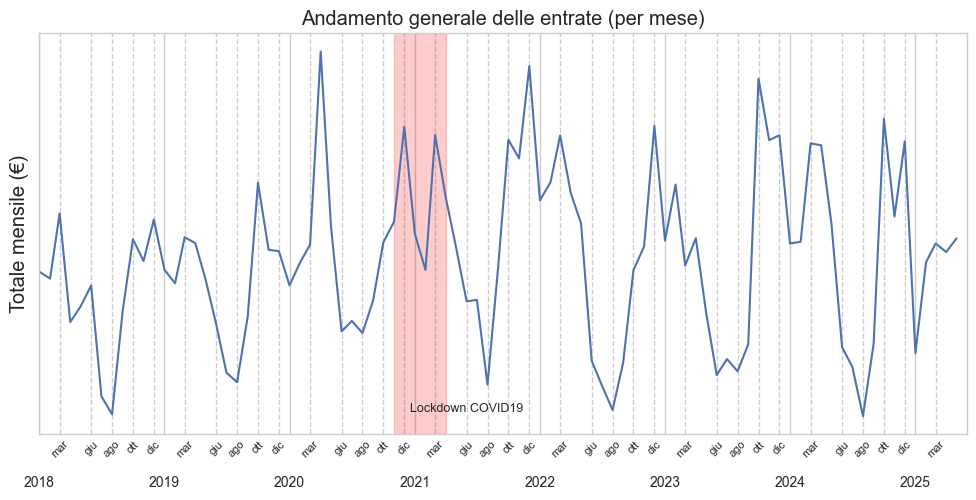

In [130]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(data=corr_mensile, x='Data', y='Totale mensile (€)')

# Major ticks: Anni
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Minor ticks: Mesi
# ax.xaxis.set_minor_locator(mdates.MonthLocator(interval=3))
ax.xaxis.set_minor_locator(mdates.MonthLocator(bymonth=[3, 6, 8, 10, 12]))
ax.xaxis.set_minor_formatter(mdates.DateFormatter('%b'))  # nomi brevi dei mesi

# Abilita minor ticks
ax.tick_params(axis='x', which='major', labelsize=10, pad=30)
ax.tick_params(axis='x', which='minor', labelsize=8, rotation=45)

# sistemo la griglia
ax.grid(which='minor', axis='x', linestyle='--')
ax.grid(False, axis='y')

# mostro il periodo covid (novembre 2020-aprile 2021)
ax.axvspan(pd.to_datetime('2020-11-1'), pd.to_datetime('2021-4-1'), color='red', alpha=0.2)
ax.text(pd.to_datetime('2021-6-1'), ax.get_ylim()[0] * 1.1, 'Lockdown COVID19', ha='center', va='bottom', fontsize='9')

ax.set_xlim(datetime(2018, 1, 1), datetime(2025, 5, 31))
ax.set_xlabel('')

ax.set_yticklabels([])  

plt.tight_layout()
ax.set_title('Andamento generale delle entrate (per mese)')
plt.show()

In [135]:
# Per sovrapporre gli anni, ricampioniamo settimanalmente
compar_anni = corrispettivi_df.resample('W').sum()
compar_anni['Totale settimanale (€)'] = compar_anni.sum(axis=1)

# compar_anni.reset_index(inplace=True)
compar_anni['Settimana'] = compar_anni.index.isocalendar().week
compar_anni['Anno'] = compar_anni.index.year
# leviamo il 2025
compar_anni = compar_anni[ compar_anni['Anno'] < 2025 ]

print('Dataset ricampionato settimanalmente')
compar_anni

Dataset ricampionato settimanalmente


Cassa 1                                           Cassa 2  \
           Reparto 1 Reparto 2 Reparto 3 Reparto 4 Reparto 5 Reparto 1   
Data                                                                     
2018-01-07    783.04    226.90      0.00      0.00       0.0    277.32   
2018-01-14   1798.05    322.42      0.00      0.00       0.0    403.51   
2018-01-21   1214.13    866.14      0.00      0.00       0.0    914.73   
2018-01-28   1955.48    314.61      0.00      0.00       0.0    517.64   
2018-02-04   1468.97    190.53      0.00      0.00       0.0    402.47   
...              ...       ...       ...       ...       ...       ...   
2024-12-01    973.82    677.31     96.75    178.33       0.0    324.08   
2024-12-08   1077.21    622.39    184.90    268.67       0.0    558.38   
2024-12-15   1094.06    865.68     83.85     77.40       0.0    479.25   
2024-12-22   1288.76   2072.18     98.50    134.95       0.0    536.78   
2024-12-29    577.66    595.70     34.58     18.10       0.0    494.79   

                                                     Cassa 3            \
           Reparto 2 Reparto 3 Reparto 4 Reparto 5 Reparto 1 Reparto 2   
Data                                                                     
2018-01-07     15.06     18.08      0.00       0.0      0.00      0.00   
2018-01-14     27.21     34.06      0.00       0.0      0.00      0.00   
2018-01-21    858.89     31.30      0.00       0.0      0.00      0.00   
2018-01-28     49.01     30.50      0.00       0.0      0.00      0.00   
2018-02-04      0.00      9.75      0.00       0.0      0.00      0.00   
...              ...       ...       ...       ...       ...       ...   
2024-12-01     94.38     24.20     63.44       0.0      0.00      0.00   
2024-12-08    358.91     22.20     56.20       0.0      0.00      0.00   
2024-12-15    228.31     43.55     24.20       0.0    470.02    529.33   
2024-12-22    830.66     27.35     68.90       0.0    616.05    116.34   
2024-12-29    215.16     21.30     22.50       0.0      0.00      0.00   

                                         Totale settimanale (€) Settimana  \
           Reparto 3 Reparto 4 Reparto 5                                    
Data                                                                        
2018-01-07       0.0       0.0       0.0                1320.40         1   
2018-01-14       0.0       0.0       0.0                2585.25         2   
2018-01-21       0.0       0.0       0.0                3885.19         3   
2018-01-28       0.0       0.0       0.0                2867.24         4   
2018-02-04       0.0       0.0       0.0                2071.72         5   
...              ...       ...       ...                    ...       ...   
2024-12-01       0.0       0.0       0.0                2432.31        48   
2024-12-08       0.0       0.0       0.0                3148.86        49   
2024-12-15       0.0       0.0     147.4                4043.05        50   
2024-12-22       0.0       0.0      23.1                5813.57        51   
2024-12-29       0.0       0.0       0.0                1979.79        52   

            Anno  
                  
Data              
2018-01-07  2018  
2018-01-14  2018  
2018-01-21  2018  
2018-01-28  2018  
2018-02-04  2018  
...          ...  
2024-12-01  2024  
2024-12-08  2024  
2024-12-15  2024  
2024-12-22  2024  
2024-12-29  2024  

[365 rows x 18 columns]

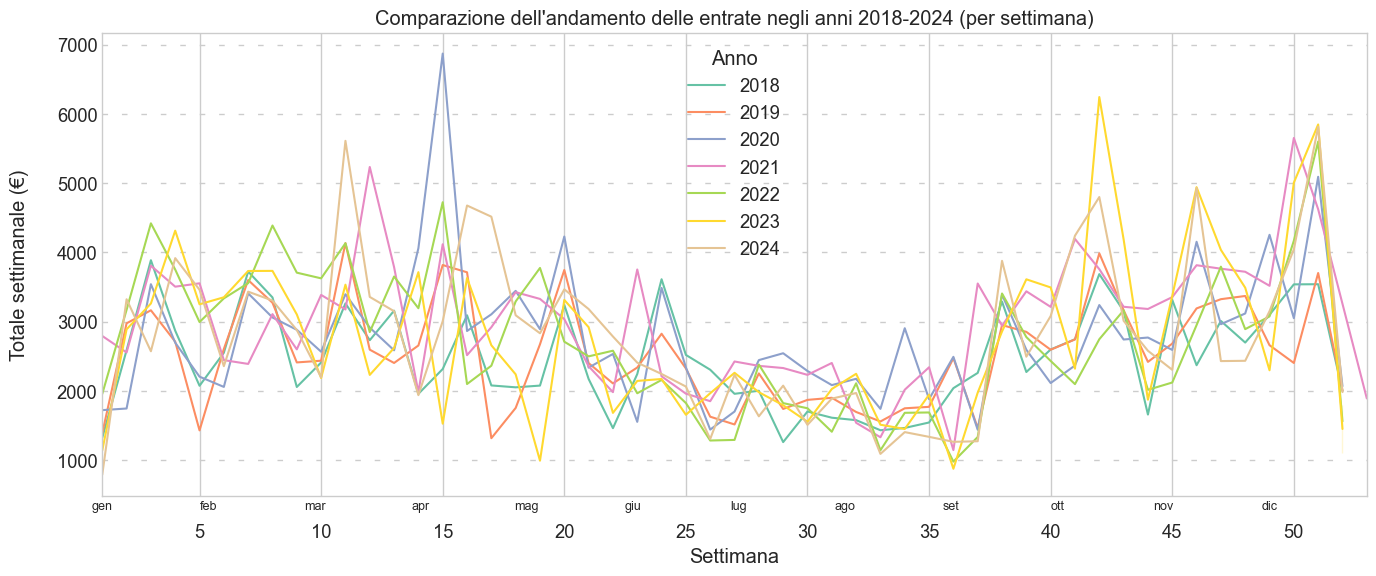

In [136]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=compar_anni, x='Settimana', y='Totale settimanale (€)', hue='Anno', palette=sns.color_palette('Set2', 7))
ax = plt.gca()

ax.set_xticks(ticks=range(0, 53, 5))
ax.tick_params(axis='x', which='major', pad=20)
# mesi come minor ticks
ax.set_xticks(np.linspace(1, 49, 12), minor=True)
ax.set_xticklabels([d.strftime('%b') for d in pd.date_range('2024-01-01', '2024-12-31', freq='MS')], minor=True, fontsize=9) # MS month start frequency
ax.set_xlim(1, 53)

ax.set_ylabel(ax.get_ylabel(), labelpad=20)

ax.grid(axis='y', linestyle=(0, (4, 10))) #(0, (3, 10, 1, 15)) means (3pt line, 10pt space, 1pt line, 15pt space) with no offset, while (5, (10, 3)), means (10pt line, 3pt space), but skip the first 5pt line

ax.set_title("Comparazione dell'andamento delle entrate negli anni 2018-2024 (per settimana)")

plt.tight_layout()
plt.show()

Con questi grafici rispondiamo alla domanda: **quali sono i mesi che vanno meglio e peggio?** Generalmente, abbiamo picchi a ottobre, dicembre e marzo (in corrispondenza delle feste, evidentemente) e cali nei mesi estivi, con agosto come mese peggiore (ma anche perché ci sono le ferie).

In [139]:
compar2425 = corrispettivi_df.copy()

compar2425['Totale giornaliero (€)'] = compar2425.sum(axis=1)
compar2425['Anno'] = compar2425.index.year
compar2425 = compar2425[ (compar2425['Anno'] >= 2024) & (compar2425.index.month <= 5) & compar2425['Totale giornaliero (€)'] > 0]
compar2425['Giorno'] = compar2425.index.day_of_year

print('Dataset per comparare giornalmente 2024 e 2025')
compar2425

Dataset per comparare giornalmente 2024 e 2025


Cassa 1                                           Cassa 2  \
           Reparto 1 Reparto 2 Reparto 3 Reparto 4 Reparto 5 Reparto 1   
Data                                                                     
2024-01-04    137.60     32.30      0.00      0.00     100.0    246.13   
2024-01-08    269.92     65.31     11.85    136.71       0.0      0.00   
2024-01-09    380.16     22.92     42.25      8.70       0.0    115.62   
2024-01-10    247.64     48.93     22.30     42.90       0.0      0.00   
2024-01-11    172.10     32.48      9.60      0.00       0.0    176.03   
...              ...       ...       ...       ...       ...       ...   
2025-05-26    143.50     22.91      7.90     10.00       NaN       NaN   
2025-05-27    175.62     24.12     39.70     12.80       NaN       NaN   
2025-05-28       NaN       NaN       NaN       NaN       NaN    234.64   
2025-05-29    104.84     57.62     40.00     20.00       NaN    145.00   
2025-05-31    331.05     35.70      5.10     31.00       NaN    395.83   

                                                     Cassa 3            \
           Reparto 2 Reparto 3 Reparto 4 Reparto 5 Reparto 1 Reparto 2   
Data                                                                     
2024-01-04    112.92      0.00    159.08       0.0       NaN       0.0   
2024-01-08      0.00      0.00      0.00       0.0       NaN       0.0   
2024-01-09     33.85      1.10     35.10       0.0       NaN       0.0   
2024-01-10      0.00      0.00      0.00       0.0       NaN       0.0   
2024-01-11     18.57      9.60      9.10       0.0       NaN       0.0   
...              ...       ...       ...       ...       ...       ...   
2025-05-26       NaN       NaN       NaN       NaN       NaN       NaN   
2025-05-27       NaN       NaN       NaN       NaN       NaN       NaN   
2025-05-28     11.59     51.95       NaN       NaN       NaN       NaN   
2025-05-29     55.84     13.65     14.20       NaN       NaN       NaN   
2025-05-31     22.10     30.25     34.20       NaN       NaN       NaN   

                                         Totale giornaliero (€)  Anno Giorno  
           Reparto 3 Reparto 4 Reparto 5                                      
Data                                                                          
2024-01-04       NaN       NaN       0.0                 788.03  2024      4  
2024-01-08       NaN       NaN       0.0                 483.79  2024      8  
2024-01-09       NaN       NaN       0.0                 639.70  2024      9  
2024-01-10       NaN       NaN       0.0                 361.77  2024     10  
2024-01-11       NaN       NaN       0.0                 427.48  2024     11  
...              ...       ...       ...                    ...   ...    ...  
2025-05-26       NaN       NaN       NaN                 184.31  2025    146  
2025-05-27       NaN       NaN       NaN                 252.24  2025    147  
2025-05-28       NaN       NaN       NaN                 298.18  2025    148  
2025-05-29       NaN       NaN       NaN                 451.15  2025    149  
2025-05-31       NaN       NaN       NaN                 885.23  2025    151  

[201 rows x 18 columns]

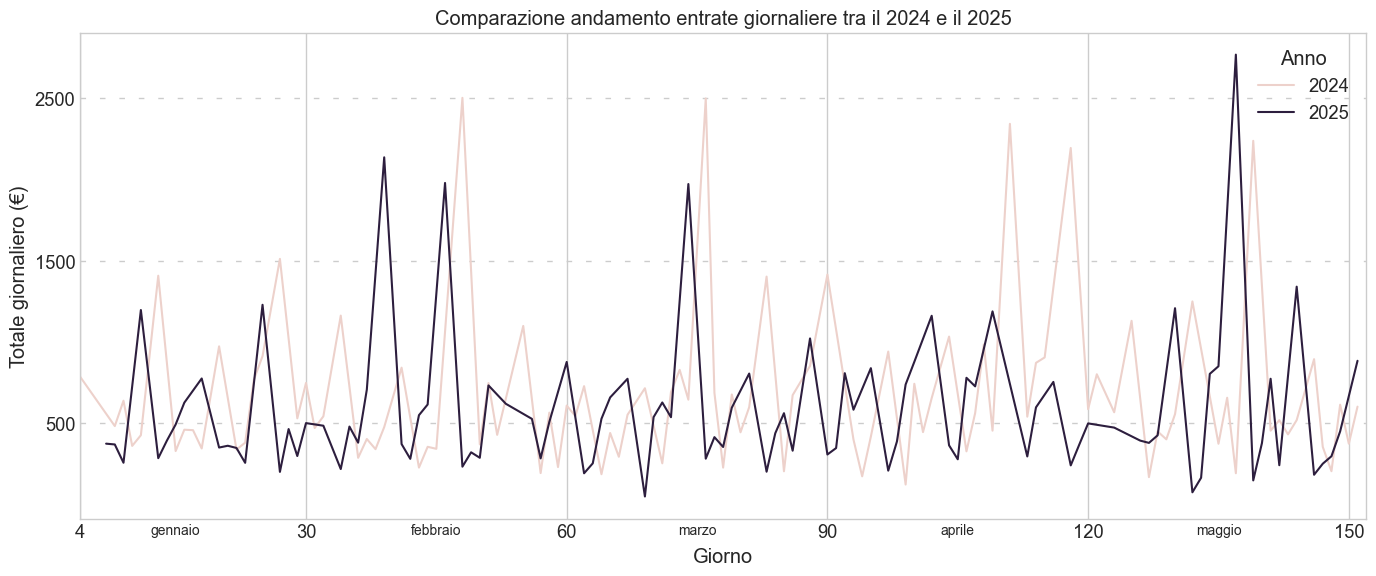

In [140]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=compar2425, x='Giorno', y='Totale giornaliero (€)', hue='Anno')

ax = plt.gca()

compar2425_xticks = [i for i in range(0, 152, 30)]
compar2425_xticks[0] = 4
ax.set_xticks(compar2425_xticks)
ax.set_xticks(range(15, 152, 30), minor=True)
ax.set_xticklabels(['gennaio', 'febbraio', 'marzo', 'aprile', 'maggio'], minor=True, fontsize=10)
ax.set_xlim(4, 152)

ax.set_yticks([500, 1500, 2500])

ax.grid(axis='y', linestyle=(0, (4, 10)))

ax.set_title('Comparazione andamento entrate giornaliere tra il 2024 e il 2025')

plt.tight_layout()
plt.show()

### Quali prodotti vanno meglio in genere?

**Problema**: Per alcuni periodi non abbiamo la separazione tra Reparto 2 e Reparto 3:
- Nel 2018 e nel 2019 la Cassa 1 batte tutto nel Reparto 2
- Nel 2021:
  - Cassa 1 da marzo a giugno batte tutto nel Reparto 2
  - Cassa 2 da aprile in poi batte tutto nel Reparto 2
- Nel 2022 la Cassa 2 torna a separare i reparti da marzo

**Soluzione**: potremmo usare i dati che abbiamo per calcolare come si distribuiscono percentualmente i due reparti negli altri anni e stimare la divisione dove i dati sono collassati, ma così praticamente staremmo manipolando i dati per confermare la nostra ipotesi. Quindi non resta che buttare via tutti i giorni in cui non abbiamo la distinzione tra i reparti

In [145]:
reparti = corrispettivi_df.copy()

reparti = reparti[
    (reparti.index.year == 2020)
    | ((reparti.index.year == 2021) & (reparti.index.month <= 2))
    | ((reparti.index.year == 2022) & (reparti.index.month >= 3))
    | (reparti.index.year >= 2023)
]

#with pd.option_context('display.max_rows', None): 
#    display(reparti)

reparti_sums = reparti.sum().unstack(level=0)
reparti_sums['Totale'] = reparti_sums.sum(axis=1)
reparti_sums['Prodotti'] = ['Formaggi e latticini', 'Carne e insaccati', 'Yogurt', 'Gelato, dessert\n e gastronomia', 'Altro (non agricolo)']

# conto quanti scontrini sono stati effettivamente battuti per ciascun reparto
reparti_count = reparti.copy()
reparti_count = (reparti_count > 0).sum().unstack(level=0)
reparti_count['Count'] = reparti_count.sum(axis=1)
print('Conteggio di quanti giorni in totale un reparto compare nel corrispettivo')
display(reparti_count)

reparti_sums['Count'] = reparti_count['Count']
reparti_sums['Totale normalizzato'] = reparti_sums['Totale'] / reparti_sums['Count']
entrata_totale = reparti_sums['Totale normalizzato'].sum()
reparti_sums['Entrata normalizzata'] = reparti_sums['Totale normalizzato'] / entrata_totale * 100
scontrini_tot = reparti_sums['Count'].sum()
reparti_sums['Corrispettivi registrati'] = reparti_sums['Count'] / scontrini_tot * 100

print('Dataset con i totali di entrate e conteggi')
display(reparti_sums)

reparti_sums_melted = reparti_sums.melt(id_vars='Prodotti', value_vars=['Entrata normalizzata', 'Corrispettivi registrati'], var_name='Tipo')
print('Stesso dataset massaggiato in forma lunga per poter plottare due serie insieme')
reparti_sums_melted

Conteggio di quanti giorni in totale un reparto compare nel corrispettivo


,Cassa 1,Cassa 2,Cassa 3,Count
Reparto 1,1005,684,26,1715
Reparto 2,901,567,42,1510
Reparto 3,902,502,2,1406
Reparto 4,626,317,0,943
Reparto 5,29,26,18,73


Dataset con i totali di entrate e conteggi


,Cassa 1,Cassa 2,Cassa 3,Totale,Prodotti,Count,Totale normalizzato,Entrata normalizzata,Corrispettivi registrati
Reparto 1,242631.43,175508.10,5713.52,423853.05,Formaggi e latticini,1715,247.144636,54.680455,30.370108
Reparto 2,89593.10,46889.04,14624.49,151106.63,Carne e insaccati,1510,100.070616,22.140504,26.739862
Reparto 3,19425.27,8660.76,22.30,28108.33,Yogurt,1406,19.991700,4.423140,24.898176
Reparto 4,20167.07,7545.52,0.00,27712.59,"Gelato, dessert\n e gastronomia",943,29.387688,6.501991,16.699132
Reparto 5,1999.15,1003.26,1040.71,4043.12,Altro (non agricolo),73,55.385205,12.253910,1.292722


Stesso dataset massaggiato in forma lunga per poter plottare due serie insieme


,Prodotti,Tipo,value
0,Formaggi e latticini,Entrata normalizzata,54.680455
1,Carne e insaccati,Entrata normalizzata,22.140504
2,Yogurt,Entrata normalizzata,4.423140
3,"Gelato, dessert\n e gastronomia",Entrata normalizzata,6.501991
4,Altro (non agricolo),Entrata normalizzata,12.253910
5,Formaggi e latticini,Corrispettivi registrati,30.370108
6,Carne e insaccati,Corrispettivi registrati,26.739862
7,Yogurt,Corrispettivi registrati,24.898176
8,"Gelato, dessert\n e gastronomia",Corrispettivi registrati,16.699132
9,Altro (non agricolo),Corrispettivi registrati,1.292722


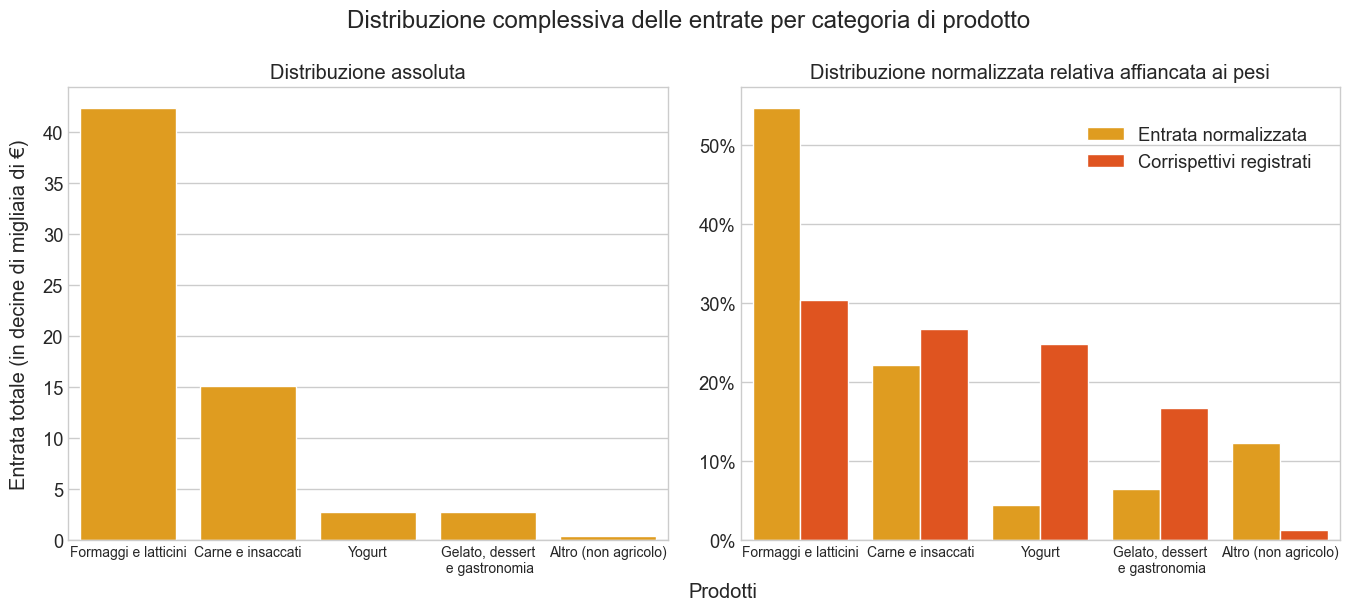

In [207]:
# mia palette custom fatta con ColorBrewer, simile ai colori dell'azienda
barplot_palette = ['orange','orangered','brown']

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
abs_ax = axes[0]
n_ax = axes[1]

fig.suptitle('Distribuzione complessiva delle entrate per categoria di prodotto')

# assoluto
sns.barplot(data=reparti_sums, x='Prodotti', y='Totale', color=barplot_palette[0], ax=abs_ax)


abs_ax.set_ylabel('Entrata totale (in decine di migliaia di €)', labelpad=10)
abs_ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda tick, pos: f'{int(tick/10_000)}'))

abs_ax.tick_params(axis='x', labelsize=10)

abs_ax.set_title('Distribuzione assoluta')

# normalizzato
sns.barplot(data=reparti_sums_melted, x='Prodotti', y='value', hue='Tipo', palette={'Entrata normalizzata': barplot_palette[0], 'Corrispettivi registrati': barplot_palette[1]}, ax=n_ax)


n_ax.set_ylabel('')
n_ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda tick, pos: f'{int(tick)}%'))

n_ax.tick_params(axis='x', labelsize=10)

n_ax.set_title('Distribuzione normalizzata relativa affiancata ai pesi')

# tolgo il titolo dalla legenda
handles, labels = n_ax.get_legend_handles_labels()
n_ax.legend(handles=handles, labels=labels)
sns.move_legend(n_ax, "upper left", bbox_to_anchor=(.55, .95))

# finto asse x comune
abs_ax.set_xlabel('')
n_ax.set_xlabel('')
fig.text(0.525, 0, 'Prodotti', ha='center')

fig.tight_layout()
#fig.subplots_adjust(top=0.88)
plt.show()

Il reparto 5 è magagnato. Leviamolo dai dati:

In [144]:
reparti_sums_no5 = reparti_sums.loc[:'Reparto 4', ['Prodotti', 'Totale normalizzato']]
reparti_sums_no5['Entrata normalizzata (%)'] = reparti_sums_no5['Totale normalizzato'] / reparti_sums_no5['Totale normalizzato'].sum() * 100
print('Stesso dataset ma senza Reparto 5')
reparti_sums_no5

Stesso dataset ma senza Reparto 5


,Prodotti,Totale normalizzato,Entrata normalizzata (%)
Reparto 1,Formaggi e latticini,247.144636,62.316686
Reparto 2,Carne e insaccati,100.070616,25.232468
Reparto 3,Yogurt,19.991700,5.040840
Reparto 4,"Gelato, dessert\n e gastronomia",29.387688,7.410006


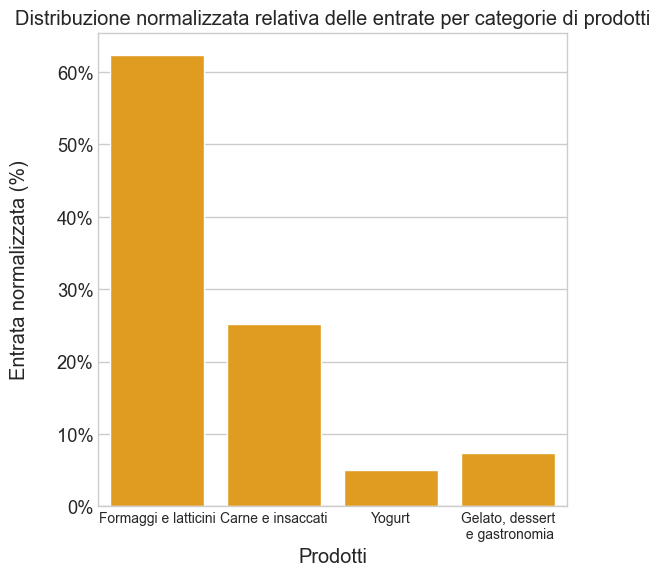

In [205]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
sns.barplot(reparti_sums_no5, x='Prodotti', y='Entrata normalizzata (%)', color=barplot_palette[0])

ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda tick, pos: f'{int(tick)}%'))
ax.set_ylabel(ax.yaxis.get_label_text(), labelpad=20)

ax.tick_params(axis='x', labelsize=10)

ax.set_title('Distribuzione normalizzata relativa delle entrate per categorie di prodotti')

fig.tight_layout()
plt.show()

In [174]:
reparti = corrispettivi_df.copy()

# porto i reparti sulle righe. future_stack sostanzialmente è la nuova implementazione che non chiama dropna e sort
reparti = reparti.stack(future_stack=True).reset_index(1, names=['Data', 'Reparto'])

# teniamo solo gli anni di cui abbiamo dati completi: 2020, 2023 e 2024 e leviamo il reparto 5
reparti['Anno'] = reparti.index.year
reparti = reparti[
    (
        (reparti['Anno'] == 2020)
        | (reparti['Anno'] == 2023)
        | (reparti['Anno'] == 2024)
    ) & (
        reparti['Reparto'] != 'Reparto 5'
    )
]
print('Dataset intermedio: porto i reparti sulle righe')
display(reparti)

rep_per_anno = reparti.pivot_table(index=['Anno', 'Reparto'], aggfunc=['sum', lambda col: (col > 0).sum()])
print('Dataset intermedio ruotato con somma e conteggi')
display(rep_per_anno)

# aggreghiamo le casse, sempre portandole sulle righe
rep_per_anno = rep_per_anno.stack(future_stack=True).groupby(['Anno', 'Reparto']).sum()

rep_per_anno['Entrata normalizzata'] = rep_per_anno['sum'] / rep_per_anno['<lambda>']
entrata_tot_n_per_anno = rep_per_anno.groupby('Anno').agg({'Entrata normalizzata': 'sum'})
rep_per_anno['Entrata normalizzata (%)'] = rep_per_anno['Entrata normalizzata'] / entrata_tot_n_per_anno['Entrata normalizzata'] * 100

rep_per_anno['Prodotti'] = ['Formaggi e latticini', 'Carne e insaccati', 'Yogurt', 'Gelato, dessert\n e gastronomia'] * 3
rep_per_anno.reset_index('Anno', inplace=True)

print('Dataset finale con entrate assolute e normalizzate per reparti raggruppato per anni')
rep_per_anno

Dataset intermedio: porto i reparti sulle righe


,Reparto,Cassa 1,Cassa 2,Cassa 3,Anno
Data,,,,,
2020-01-01,Reparto 1,0.00,367.61,NaN,2020
2020-01-01,Reparto 2,0.00,0.00,NaN,2020
2020-01-01,Reparto 3,0.00,0.00,NaN,2020
2020-01-01,Reparto 4,NaN,NaN,NaN,2020
2020-01-02,Reparto 1,158.63,0.00,NaN,2020
...,...,...,...,...,...
2024-12-30,Reparto 4,5.00,NaN,NaN,2024
2024-12-31,Reparto 1,84.44,149.65,NaN,2024
2024-12-31,Reparto 2,105.76,80.36,NaN,2024


Dataset intermedio ruotato con somma e conteggi


sum                    <lambda>                
                 Cassa 1   Cassa 2  Cassa 3  Cassa 1 Cassa 2 Cassa 3
Anno Reparto                                                        
2020 Reparto 1  53385.28  64041.97     0.00      203     207       0
     Reparto 2  12363.31   9459.71     0.00      165     154       0
     Reparto 3   3494.94   1425.05     0.00      153     104       0
     Reparto 4   1083.04    995.86     0.00       10      37       0
2023 Reparto 1  55613.10  36204.76     6.50      235     165       1
     Reparto 2  23353.89  11471.95  2658.05      221     129       6
     Reparto 3   3946.54   2764.82     0.00      218     152       0
     Reparto 4   5144.81   1532.41     0.00      180      81       0
2024 Reparto 1  57454.48  25965.83  3495.79      244     121      10
     Reparto 2  25378.60  10572.15  5698.22      216     113      12
     Reparto 3   5666.62   1552.70    22.30      238     112       2
     Reparto 4   7493.57   3089.07     0.00      211     102       0

Dataset finale con entrate assolute e normalizzate per reparti raggruppato per anni


,Anno,sum,<lambda>,Entrata normalizzata,Entrata normalizzata (%),Prodotti
Reparto,,,,,,
Reparto 1,2020,117427.25,410,286.407927,68.486776,Formaggi e latticini
Reparto 2,2020,21823.02,319,68.410721,16.358590,Carne e insaccati
Reparto 3,2020,4919.99,257,19.143930,4.577758,Yogurt
Reparto 4,2020,2078.90,47,44.231915,10.576876,"Gelato, dessert\n e gastronomia"
Reparto 1,2023,91824.36,401,228.988429,60.578583,Formaggi e latticini
Reparto 2,2023,37483.89,356,105.291826,27.854812,Carne e insaccati
Reparto 3,2023,6711.36,370,18.138811,4.798598,Yogurt
Reparto 4,2023,6677.22,261,25.583218,6.768006,"Gelato, dessert\n e gastronomia"
Reparto 1,2024,86916.10,375,231.776267,56.766566,Formaggi e latticini


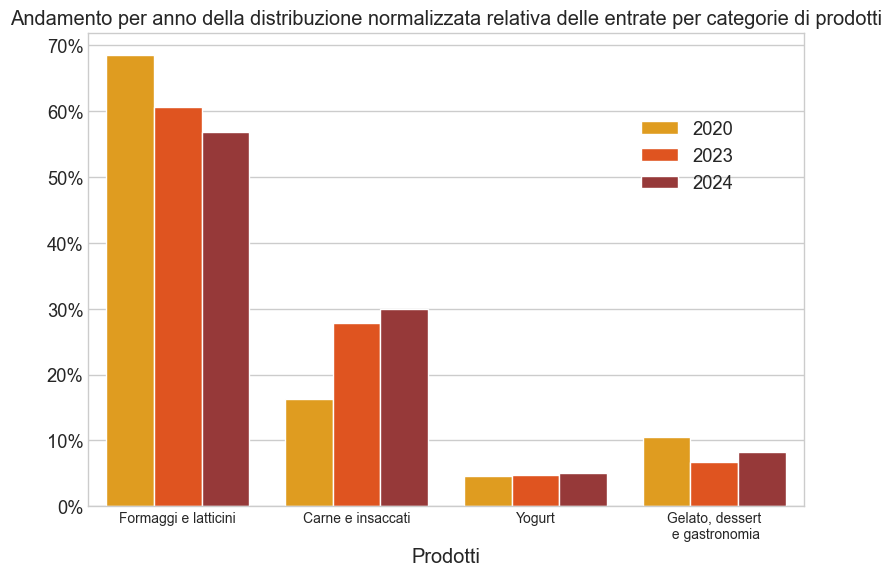

In [218]:
plt.figure(figsize=(8, 6))
sns.barplot(rep_per_anno, x='Prodotti', y='Entrata normalizzata (%)', hue='Anno', palette=barplot_palette)
ax = plt.gca()

ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda tick, pos: f'{int(tick)}%'))
ax.set_ylabel('')

ax.tick_params(axis='x', labelsize=10)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=labels)
sns.move_legend(ax, "upper left", bbox_to_anchor=(.75, .85))

ax.set_title('Andamento per anno della distribuzione normalizzata relativa delle entrate per categorie di prodotti')

plt.tight_layout()
plt.show()